# Predicting heart disease using maching learning 

Used various Python-based machine learning and data science libraries in anttempt to build a machine learning model capable of predicting if an individual has heart disease based on their medical attributes.

Defining steps to approach the project:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Expreimentation

**1. Problem definition** 

> Finding out if we are given the clinical parameters of patients, if we would be able to predict whether or not the patient had heart disease.

**2. Data**

> The original data is from the Cleavland data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease) 

> The data used here is from [Kaggle](https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci/data) which is a copy. 

**3. Evaluation**

> If we can attain 95% accuracy wether or not a patient has heart disease or not we can pursue launching the project.

**4. Features**

Information about the data: 


* age (Age of the patient in years)
* origin (place of study)
* sex 
>  * Male = 1 
> * Female = 0
* cp chest pain type 
> * typical angina (0): This is chest pain related to reduced blood flow to the heart. 
> * atypical angina (1): This is chest pain not related to the heart.
> * non-anginal (2): This is chest pain not caused by a heart problem. Mostly gastrointenstinal issues. Muscle/issues in the chest wall. 
> * asymptomatic (3): Chest pain not showing signs of disease. 
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
> -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: 
> [normal; fixed defect; reversible defect]
* target: if a patient has disease or not
> 1 for yes. 0 for no.


In [2]:

# Importing the standard libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
%matplotlib inline

# Importing the classes for the machine learning estimators to be used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing the evaluation methods
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

## Load the data

In [3]:
df = pd.read_csv('../Downloads/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Refer to the data features to understand the data better. 

In [5]:
# Finding the number of individulas who has the disease or not

disease_or_not = df.target.value_counts()
disease_or_not

1    165
0    138
Name: target, dtype: int64

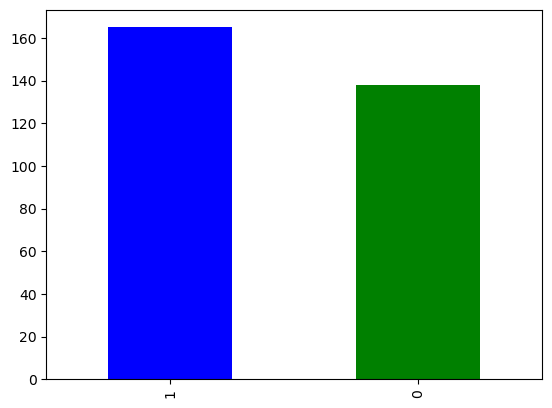

In [6]:
disease_or_not.plot(kind='bar', color=['blue', 'green']);

In [7]:
df.info()  # Finding out the information on the features of the data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()  # Finding the number of missing data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()  # Finding out a quick statistical metrics on the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [10]:

sex_disease = df[['sex', 'target']]  # Creating a dataframe to check how many men and women have and don't have heart disease

sex_disease['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

There are 207 men and 96 women

In [11]:
heart_disease_per_sex = sex_disease.groupby(['target', 'sex']).agg({'sex': pd.Series.count})
heart_disease_per_sex

sex
target sex     
0      0     24
       1    114
1      0     72
       1     93

From the dataframe we can see that there are more men with heart disease than more women. Also, it could be as a result that the dataset contains more men to women. So there is an imbalance in that regard. Mathematically, it computes that there is a 75% chance that a woman has heart disease amongst women and a 33% chance that they don't. For men, it is approximately 81% if they have amongst the male samples and 122% chance that they don't have. 

We can infer, that there is a chance that roughly 65% of samples we will encounter will have heart disease. 

In [12]:
# Using the cross tab function to confirm groupby results

ct_heart_disease_per_sex = pd.crosstab(df.target, df.sex)
ct_heart_disease_per_sex

sex,0,1
target,,
0,24,114
1,72,93


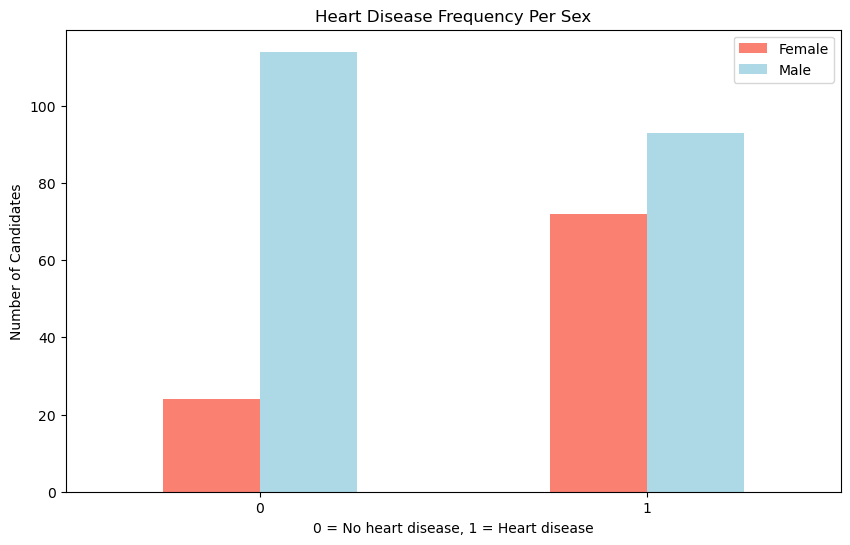

In [13]:
# Visualising the information

ct_heart_disease_per_sex.plot(kind='bar',
                              color=['salmon', 'lightblue'],
                              figsize=(10, 6)
                             );

plt.title('Heart Disease Frequency Per Sex')
plt.xlabel('0 = No heart disease, 1 = Heart disease')
plt.ylabel('Number of Candidates')
plt.legend(['Female', 'Male']),
plt.xticks(rotation=0);

### Heart Disease and the `thalach` feature

thalach: maximum heart rate achieved
    
With the age, we can determine if the heart rate is also a contributor to testing positive in being diagnosed with heart disease

In [14]:
age_thalach = df[['age', 'thalach', 'target']]
age_thalach.head()

,age,thalach,target
0,63,150,1
1,37,187,1
2,41,172,1
3,56,178,1
4,57,163,1


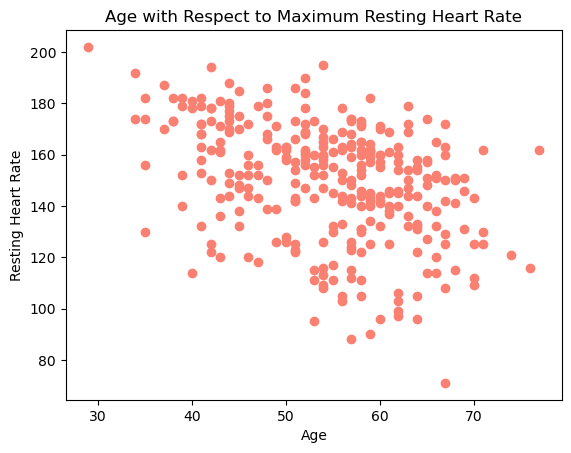

In [15]:
plt.scatter(age_thalach.age,
            age_thalach.thalach,
            c='salmon'
           );

plt.title("Age with Respect to Maximum Resting Heart Rate")
plt.xlabel("Age")
plt.ylabel("Resting Heart Rate");

This is a general overview of all the patients. There is a clear downward trend with the resting heart rate with respect to age. The older a patient gets, the lower the resting heart rate. 

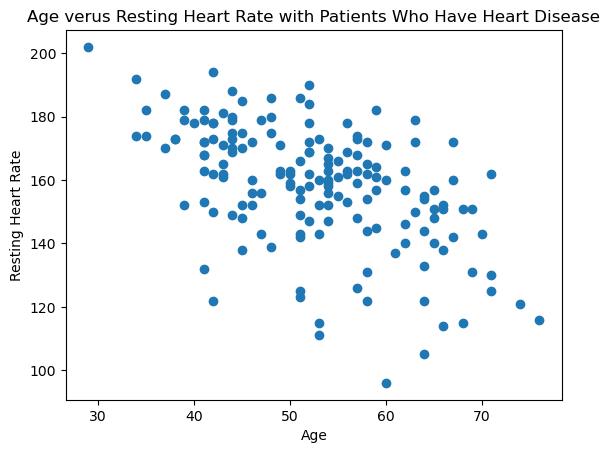

In [16]:
plt.scatter(age_thalach['age'][age_thalach.target == 1],
            age_thalach['thalach'][age_thalach.target == 1]
           )
plt.title("Age verus Resting Heart Rate with Patients Who Have Heart Disease")
plt.xlabel("Age")
plt.ylabel("Resting Heart Rate");


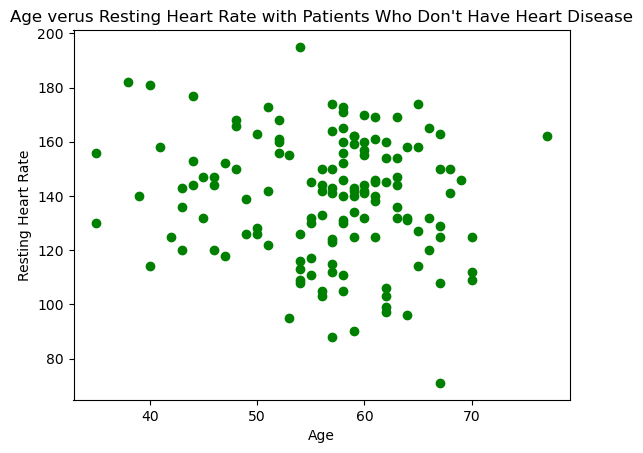

In [17]:
plt.scatter(age_thalach['age'][age_thalach.target == 0],
            age_thalach['thalach'][age_thalach.target == 0],
            c='green'
           )
plt.title("Age verus Resting Heart Rate with Patients Who Don't Have Heart Disease")
plt.xlabel("Age")
plt.ylabel("Resting Heart Rate");

From the information above, there is no certain clarity if a higher resting heart rate leads to heart disease. Howerver, one can infer from the scatter plots above that there is a cluster for negative tested patients to have a higher heart rate than those with a positive tested patients. 

In [18]:
# checking the distribution with the age column on histogram

# df.age.plot(kind='hist');

fig = px.histogram(df, 
                   x='age', 
                   color='sex', 
                   nbins=15,
                  )

fig.update_layout(xaxis_title='Age', yaxis_title='Number of Patients')
fig.show()

The age follows a normal distribution with a skewness to the right. It also shows that there is a lack of younger patients (30s) and aged patients(80s) compared to the median age. 

#### Checking out the relationship between chest pain and heart disease

* cp chest pain type 
> * typical angina (0): This is chest pain related to reduced blood flow to the heart. 
> * atypical angina (1): This is chest pain not related to the heart.
> * non-anginal (2): This is chest pain not caused by a heart problem. Mostly gastrointenstinal issues. Muscle/issues in the chest wall. 
> * asymptomatic (3): Chest pain not showing signs of disease. 


In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Taking a look at the information, most patients without heart disease tend to fall under the `non-anginal` group. Which is a bit confusing as it falls under a non-related heart issue. The same applies to the `atypical angina`  group which has the second highest number of positive heart disease cases. 

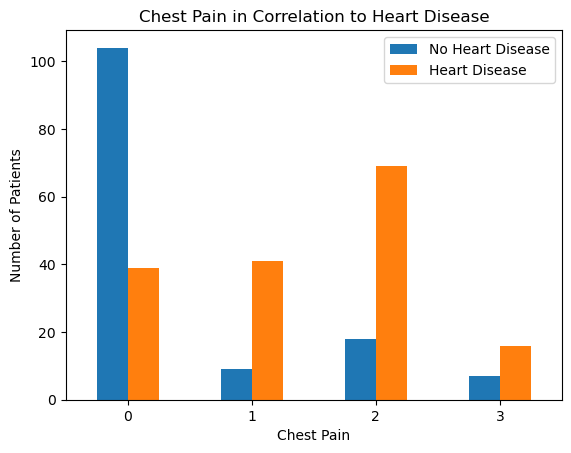

In [20]:
pd.crosstab(df.cp, df.target).plot(kind='bar')

plt.title("Chest Pain in Correlation to Heart Disease")
plt.xlabel("Chest Pain")
plt.ylabel("Number of Patients")
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0);

In [21]:
# Checking the correlation between the independent features

corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


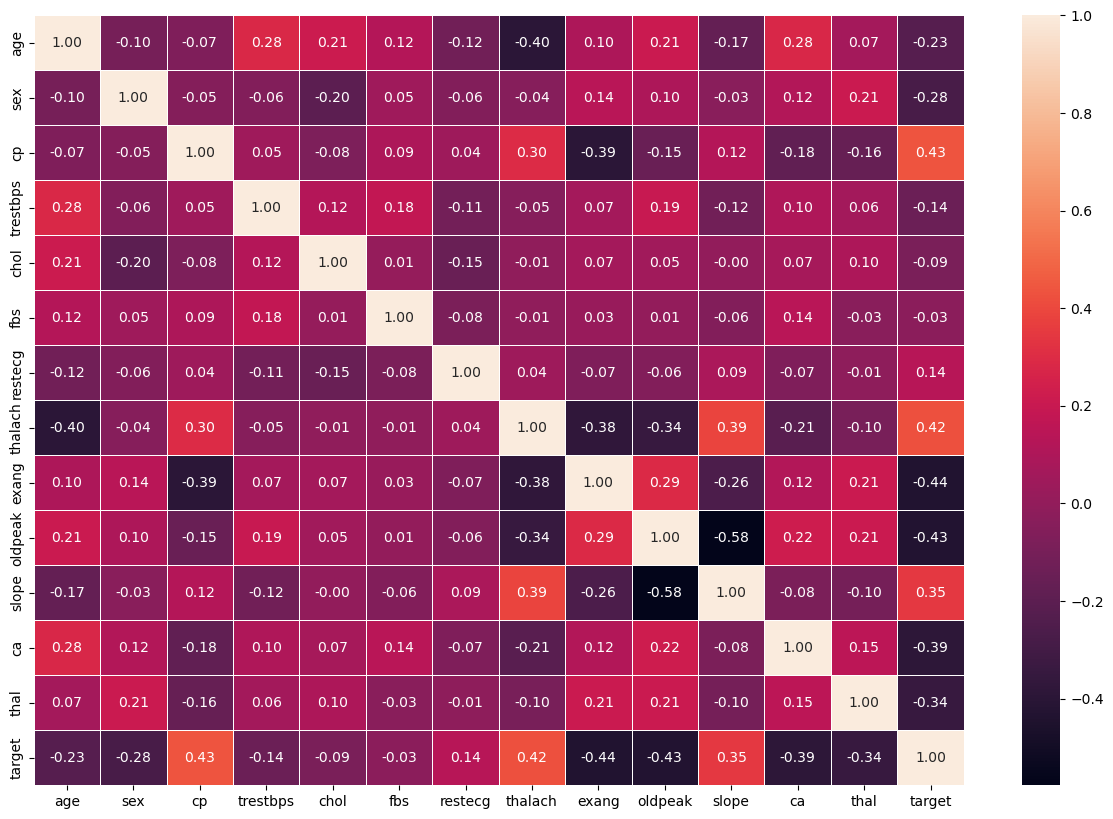

In [22]:
# Visualising the correlation matrix

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 linewidths=0.5,
                 fmt='.2f', 
                 annot=True
                );

Investigating the correlation matrix, it makes a little bit of sense as to why there is an increase with positive cases than negative cases in regards to the chest pain. There is a positive correlation with chest pain and heart disease. The higher the value, the more positive correlation we have. In regards to the chest pain and target, there is a 0.43 correlation indicating a positive correlation. 

If we take a the resting heart rate `thalach` there is also a positive correlation. 

### Building a Machine Learning Model

In [23]:
# Splitting the data into X and y (features and target)

X = df.drop(columns=['target'])  # Features
y = df.target  # Target

In [24]:
# Splitting the data into training test splits. 

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [25]:
# Building a Class to ease the evaluation of the machine learning model


class Classifier:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'RandomForestClassifier': RandomForestClassifier(),
          'KNeighborsClassifier': KNeighborsClassifier()
         }
        self.results = {}
        
    def fit_evaluate_model(self):
        for model_name, model_estimator in self.models.items():
            model_estimator.fit(self.X_train, self.y_train)
            self.results[model_name] = model_estimator.score(X_test, y_test)
        return self.results


In [26]:
clf__ = Classifier(X_train, X_test, y_train, y_test)

print(clf__.fit_evaluate_model())

{'Logistic Regression': 0.8852459016393442, 'RandomForestClassifier': 0.8524590163934426, 'KNeighborsClassifier': 0.6885245901639344}


In [27]:
# Visualising the accuracy

model_accuracy = pd.DataFrame({'Model Name': clf__.results.keys(),
              'Accuracy': clf__.results.values()
             })

fig = px.bar(model_accuracy, x='Model Name', y='Accuracy', color='Model Name', title='Accuracy of the Models')
fig.update_layout(xaxis_title='Model Name',
                  yaxis_title='Accuracy'
                 )
fig.show()

Walking through the models we have tried so far the models chosen have been gotten from the [Scikit documention]() and upon fitting the models and scoring them the [Logistic Regression]() (although it may sound counter intuitive that we are using a model that has the word regression in it, we are actually trying to predict a classification model) has come out on top with an 88% accuracy. Although this is far off from the suggested benchmark--95%--it is a great start. We will then evaluate the best model and then see if we can improve on its hyperparameters. 

Checking out the hyperparemeters of the best model:

In [28]:
clf__.models['Logistic Regression'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

So basically, what this means is we will look at tweaking the hyperparameters of the model and see if we can improve on the accuracy.

To do this, I wil be using the [GridSearchCV]() and [RandomizedSearchCV]() a module on the Scikit library that helps with finding the best parameters for the model we've chosen to go with. 



In [29]:
# Using the GridSearchCV

from sklearn.model_selection import RepeatedStratifiedKFold

# Firstly, we need the specific model parameter we need to work on. For the Logistic Regressor model look above. 

parameters = {'C': np.logspace(-4, 4, 50),
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']
             }

# scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision']

cv_ = RepeatedStratifiedKFold(n_splits=10,
                              n_repeats=3,
                              random_state=1
                             )

grid_search = GridSearchCV(estimator=clf__.models['Logistic Regression'],
                           param_grid=parameters,
                           # scoring=scoring,
                           cv=cv_, 
                           verbose=2
                           # refit=False
                          )

grid_search.fit(X_train, y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, 

[CV] END C=0.00014563484775012445, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00021209508879201905, penalty=l1, solver=liblinear; total time=

[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0004498432668969444, penalty=l1, solver=liblinear; total time=   0.0s
[CV]

[CV] END C=0.0009540954763499944, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV]

[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0020235896477251557, penalty=l2, solver=liblinear; total time=   0.0s
[CV]

[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004291934260128779, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0062505519252739694, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00

[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.009102981779915217, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.013257113655901081, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.013

[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.019306977288832496, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.02811768697974228, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.02811768697974228, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.02811

[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040949150623804234, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.040

[CV] END C=0.08685113737513521, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.086851137375135

[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.18420699693267145, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.184206996932671

[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.3906939937054613, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.39069399370546

[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.2067926406393288, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.20679264063932

[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.559547922699533, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2.5595479226995

[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.428675439323859, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=5.4286754393238

[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.5139539932644

[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.420530945486497, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=24.4205309454864

[CV] END .C=35.564803062231285, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=35.564803062231285, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=35.564803062231285, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=35.564803062231285, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=35.564803062231285, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=51.79474679231202, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=51.79474679231202, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=51.79474679231202, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=51.79474679231202, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=51.79474679231202, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=51.79474679231202, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=51.79474679231202, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=51.794746792312

[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.85411419875572, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=109.854114198755

[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.99518105153672, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=232.995181051536

[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=339.3221771895323, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=494.1713361323828, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=494.17133613238

[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.1131341546852, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1048.11313415468

[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.996482526191, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=2222.9964825261

[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.8663634573895, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=4714.86636345738

[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.325711...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=2)

In [30]:
grid_search_best_parmas = grid_search.best_params_
grid_search_best_parmas

{'C': 0.18420699693267145, 'penalty': 'l2', 'solver': 'liblinear'}

In [31]:
grid_search_clf = LogisticRegression(C=grid_search_best_parmas['C'],
                         penalty=grid_search_best_parmas['penalty'],
                         solver=grid_search_best_parmas['solver']
                        )

grid_search_clf.fit(X_train, y_train)
grid_search_clf.score(X_test, y_test)

0.8852459016393442

In [32]:
clf__.results

{'Logistic Regression': 0.8852459016393442,
 'RandomForestClassifier': 0.8524590163934426,
 'KNeighborsClassifier': 0.6885245901639344}

Upon using the GridSearch to search for the best parameters to use we could see that the accuracy still wasn't improved. We will need to try improving the RandomForestClassifier model which is the next best model. 

In [33]:
rcl_grid = {'n_estimators': np.arange(10, 100, 20),
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2)
           }

rcl_gs = GridSearchCV(estimator=clf__.models['RandomForestClassifier'],
                      param_grid=rcl_grid,
                      verbose=2,
                      cv=3
                     )

rcl_gs.fit(X_train, y_train)


Fitting 3 folds for each of 1800 candidates, totalling 5400 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_dept

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_esti

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=50;

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_esti

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=10;

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_esti

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=90;

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_esti

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_esti

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_esti

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_esti

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END m

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=   0.0s


[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END m

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=10; total time=   0.0s


[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=10, n_estimators=90; total time=   0.0s


[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END m

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=10; total time=   0.0s

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=90; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.0s

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=10; total tim

[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=70; total time=   0.0s


[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=18, n_estimators=10; total tim

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=70; total tim

[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=4, n_estimators=30; total time=   0.0s


[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=14, n_estimators=90; total tim

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END m

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[C

[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=90; total time=   0.0s


[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END m

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.0s


[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=50; total time=   0.0s
[C

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END m

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=50; total time=   0.0s


[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=8, n_estimators=30; total time=   0.0s


[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=18, n_estimators=90; total tim

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total tim

[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=10; total time=   0.0s


[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=50; total tim

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=10; total time=   0.

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=70; total time=   0.0s


[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=14, n_estimators=10; total tim

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.0s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=50; total tim

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=10; total tim

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=90; total time=   0.0s


[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total tim

[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.0s


[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=50; total tim

[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=10; total tim

[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=50;

[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=12, n_estimators=10;

[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=4, n_estimators=50; total tim

[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=10;

[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total tim

[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=18, n_estimators=90;

[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=10, n_estimators=70; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=10, n_estimators=90; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=30;

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 30, 50, 70, 90])},
             verbose=2)

In [57]:
rcl_gs.best_params_

{'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 8,
 'n_estimators': 30}

In [58]:
new_clf = RandomForestClassifier(max_depth=5,
                                 min_samples_leaf=9,
                                 min_samples_split=8,
                                 n_estimators=30
                                )

new_clf.fit(X_train, y_train)
new_clf.score(X_test, y_test)

0.8688524590163934

In [59]:
clf__.results

{'Logistic Regression': 0.8852459016393442,
 'RandomForestClassifier': 0.8524590163934426,
 'KNeighborsClassifier': 0.6885245901639344}

From the above tuning, Logistic Regression model looks to be the better model even though there has been an minute increase in the accuracy for Random Forest Classifier. 

##### Using RandomisedSearchCV

Since we already have the grids needed to perform the tasks all we need to do is create an object from the RandomisedSearchCv and then see if they would yield any better results for the models


In [60]:
lr_rscv = RandomizedSearchCV(estimator=clf__.models['Logistic Regression'], 
                             param_distributions=parameters,
                             cv=5,
                             n_iter=20, 
                             verbose=2
                            )
lr_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.513953993264458, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0009540954763499944, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08685113737513521, penal

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=2)

In [61]:
lr_rscv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.18420699693267145}

In [62]:
clf = LogisticRegression(C=0.18420699693267145,
                         penalty='l2',
                         solver='liblinear'
                        )
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8852459016393442

In [63]:
rc_rscv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions=rcl_grid,
                             verbose=2,
                             cv=cv_
                            )
rc_rscv.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=70; total time=   0.0s
[CV] END max_depth=5, min_samples_lea

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=50; total time=   0.

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=10; total tim

[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total tim

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 30, 50, 70, 90])},
                   verbose=2)

In [64]:
rc_rscv.best_params_

{'n_estimators': 70,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [65]:
rc_rscv.best_score_

0.8292222222222222

In [66]:
clf = RandomForestClassifier(n_estimators=70,
                             min_samples_leaf=15,
                             min_samples_split=6,
                             max_depth=3
                            )

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

Upon finetuning the models, it is evident that the LogisticRegression model is the best to use. 

## Evaluating our model beyond accuracy

I wil be evaluating the:
* ROC Curve
* AUC Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score


What this basically surmises to is comparing the predicted labels to the truth labels which is the `y_test` series and see how well the model is performing. 

In [67]:
# Making predictions with tuned model:

y_preds = rcl_gs.predict(X_test)

In [68]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

We can compare the predictions to the test data:
    

In [69]:
np.array(y_preds == y_test)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

#### ROC (Receiver Operating Characteristics) and AUC (Area Under the ROC)

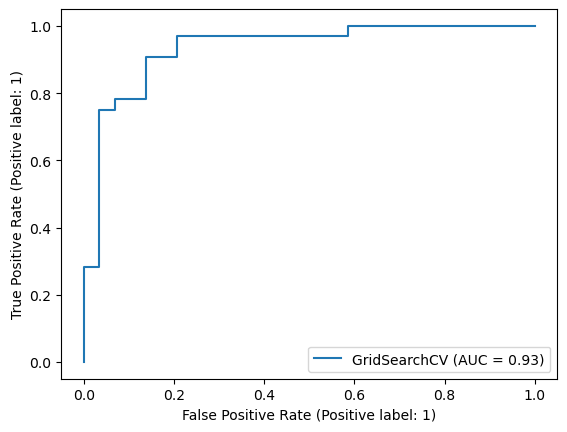

In [70]:
RocCurveDisplay.from_estimator(estimator=rcl_gs,
                               X=X_test,
                               y=y_test
                              )

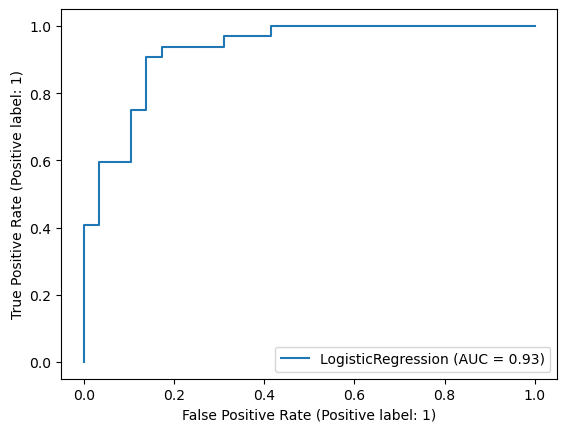

In [71]:
RocCurveDisplay.from_estimator(estimator=grid_search_clf,
                               X=X_test,
                               y=y_test
                              )

In [72]:
# Confusion matrix

confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 4, 28]], dtype=int64)

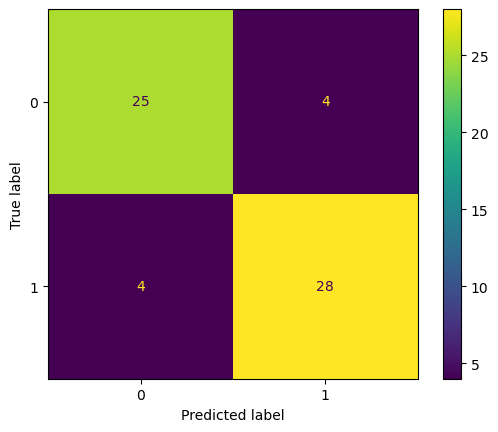

In [73]:
ConfusionMatrixDisplay.from_estimator(estimator=rcl_gs,
                                      X=X_test,
                                      y=y_test,
                                     );

In [74]:
# Getting a classification report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



We can see that our model does well with the confusion matrix. And has a balanced out false positives and false negatives. 

Although the metrics on our classification report looks great. I am going to crosscheck them using the cross-validation scoring metric. 

In [75]:
precision_cv = np.mean(cross_val_score(estimator=grid_search_clf,
                X=X,
                y=y,
                scoring='precision',
                cv=5
               ))
precision_cv


0.8207936507936507

In [76]:
accuracy_cv = np.mean(cross_val_score(estimator=grid_search_clf,
                                      X=X,
                                      y=y,
                                      scoring='accuracy',
                                      cv=5
                                     )
                     )
accuracy_cv

0.8446994535519124

In [77]:
recall_cv = np.mean(cross_val_score(estimator=grid_search_clf,
                                      X=X,
                                      y=y,
                                      scoring='recall',
                                      cv=5
                                     )
                     )
recall_cv

0.9212121212121213

In [78]:
f1_cv = np.mean(cross_val_score(estimator=grid_search_clf,
                                      X=X,
                                      y=y,
                                      scoring='f1',
                                      cv=5
                                     )
                     )
f1_cv

0.8673007976269721

In [79]:
# Visualising the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
scores =[accuracy_cv, precision_cv, recall_cv, f1_cv]
cv_metrics = pd.DataFrame({'Metrics': metrics,
                           'Scores': scores
                          }
                         )

cv_metrics

fig = px.bar(cv_metrics, x='Metrics', y='Scores', color='Metrics', title='Visualising Cross Validated Metric Scores')
fig.update_layout(xaxis_title='Metrics', yaxis_title='Scores')
fig.show()

From the above machine learning model developed I could see that I could not attain the 95% accuracy as specified. 

This could result as in the number of data available for the machine learning model. Perhaps getting more data might improve on the accuracy of the data. Also, researching on more ways to improve the current data might improve on the model as well. 